# Time Series Analysis on Weather Data

# About the Dataset:

All the data recorded is the temp(in degrees)between 9-10pm slot.Hence these are kind of instantantneous readings of temperature which result in some fluctuations from ideal behavior as we analyze.

In [ ]:
!pip install prophet


# Histogram of Actual Temperatures

In [ ]:
from prophet import Prophet

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('/content/alldays_analysis - Sheet1.csv')

In [ ]:
data.head()

,Date,Actual Temp,Predicted_temp_day1,Predicted_temp_day2,Predicted_temp_day3
0,2/6/2024,31,29,29,28
1,3/6/2024,28,28,27,27
2,4/6/2024,28,26,26,26
3,5/6/2024,27,26,26,26
4,6/6/2024,26,28,27,28


In [ ]:
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y') # Specify the correct date format

# Exploratory Statistics

In this section we aim to calculate the mean,median ,mode of the actual temperatures and obtain a histrogram of actual temperatures throughout the dataset.

1. Mean (Average)

Formula:
 Sum of all values in the dataset / Number of values in the dataset

2. Median (Middle Value)

Formula:
If the dataset has an odd number of values: The middle value when the data is arranged in ascending order.
If the dataset has an even number of values: The average of the two middle values when the data is arranged in ascending order.

3. Mode (Most Frequent Value)

Formula:
The value that appears most frequently in the dataset.



In [ ]:
# Calculate mean, median, and mode
# Calculate mean, median, and mode
mean_temp = data['Actual Temp'].mean()
median_temp = data['Actual Temp'].median()
mode_temp = data['Actual Temp'].mode()[0]  # mode() returns a Series

print(f"Mean Temperature: {mean_temp}")
print(f"Median Temperature: {median_temp}")
print(f"Mode Temperature: {mode_temp}")


Mean Temperature: 27.025
Median Temperature: 27.0
Mode Temperature: 26


**Histogram plot**

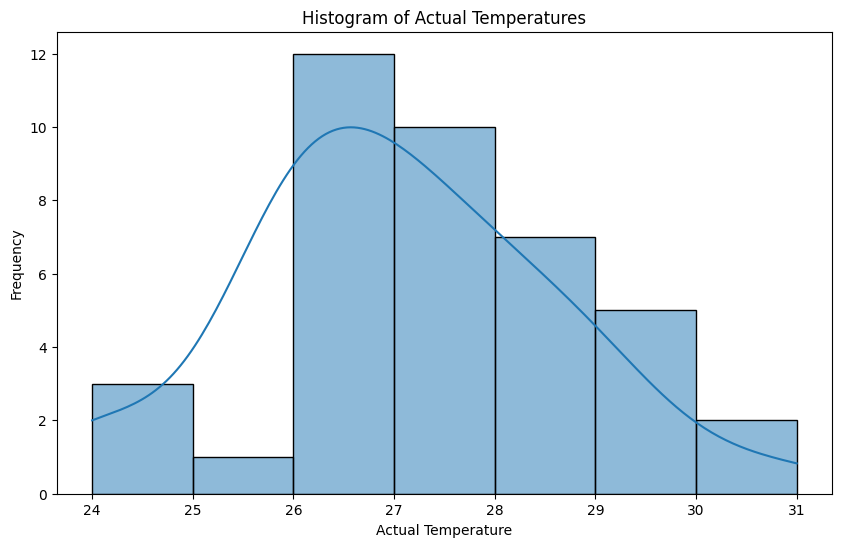

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a histogram
plt.figure(figsize=(10, 6))
sns.histplot(data['Actual Temp'], kde=True)
plt.title('Histogram of Actual Temperatures')
plt.xlabel('Actual Temperature')
plt.ylabel('Frequency')
plt.show()


In [ ]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 29.4 MB/s eta 0:00:00


# For the 3 day dataset

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
import pandas as pd
df=pd.read_csv('/content/First#3days - Sheet1 (1).csv', parse_dates=['Date']) # Read the CSV without setting 'Date' as index initially
df['Date'] = df['Date'].dt.strftime('%m-%d-%Y') # Reformat the 'Date' column
df = df.set_index('Date') # Now set 'Date' as the index
print('Shape of data',df.shape)
df.head()
df

Shape of data (6, 4)


,Actual Temp,Predicted_temp_day1,Predicted_temp_day2,Predicted_temp_day3
Date,,,,
02-06-2024,31,29,29,28
03-06-2024,28,28,27,27
04-06-2024,28,26,26,26
05-06-2024,27,26,26,26
06-06-2024,26,28,27,28
07-06-2024,26,26,26,26


<Axes: xlabel='Date'>

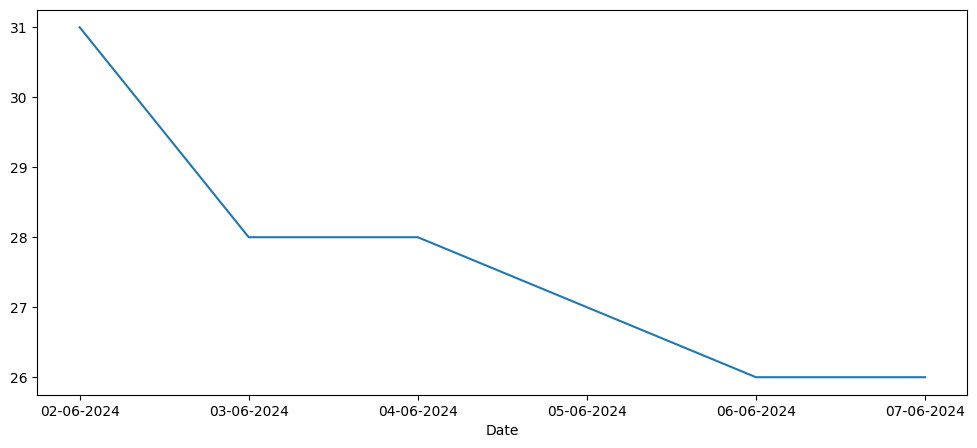

In [ ]:
df['Actual Temp'].plot(figsize=(12,5))

# Checking for Stationarity

In [ ]:
from statsmodels.tsa.stattools import adfuller
def ad_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)


In [ ]:
from statsmodels.tsa.stattools import adfuller

def ad_test(dataset):
    dftest = adfuller(dataset, autolag = 'AIC')
    print("1. ADF : ",dftest[0])
    print("2. P-Value : ", dftest[1])
    print("3. Num Of Lags : ", dftest[2])
    print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
    print("5. Critical Values :")
    for key, val in dftest[4].items():
        print("\t",key, ": ", val)

# Call the function after it's defined
ad_test(df['Actual Temp'])

1. ADF :  -0.8029550685469659
2. P-Value :  0.8182524970651077
3. Num Of Lags :  1
4. Num Of Observations Used For ADF Regression: 4
5. Critical Values :
	 1% :  -7.355440625
	 5% :  -4.474365000000001
	 10% :  -3.1269325


# Figuring out the order for ARIMA Model

In [ ]:
pip install pmdarima

In [ ]:
from pmdarima import auto_arima
#ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
stepwise_fit = auto_arima(df['Actual Temp'], trace=True,
suppress_warnings=True)

stepwise_fit.summary()


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=151.653, Time=0.61 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=152.104, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=145.749, Time=0.16 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=147.706, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=379.386, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=147.687, Time=0.49 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=147.696, Time=0.52 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=149.672, Time=0.27 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.05 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 2.237 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   40
Model:               SARIMAX(1, 0, 0)   Log Likelihood                 -69.875
Date:                Wed, 24 Jul 2024   AIC                            145.749
Time:                        07:14:04   BIC                            150.816
Sample:                             0   HQIC                           147.581
                                 - 40                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     14.3820      3.891      3.696      0.000       6.755      22.009
ar.L1          0.4695      0.143      3.276      0.001       0.189       0.750
sigma2         1.9154      0.514      3.727      0.000       0.908       2.923
===================================================================================
Ljung-Box (L1) (Q):                   0.33   Jarque-Bera (JB):                 0.53
Prob(Q):                              0.57   Prob(JB):                         0.77
Heteroskedasticity (H):               1.05   Skew:                             0.25
Prob(H) (two-sided):                  0.93   Kurtosis:                         2.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

# Spliting the data into training and testing

    we use the initial 3 days entries for traiining the model
    and next 3 days entries for testing

In [ ]:
print(df.shape)
train=df.iloc[:3]
test=df.iloc[-3:]
print(train.shape,test.shape)

(6, 4)
(3, 4) (3, 4)


# Training the model

In [ ]:
from statsmodels.tsa.arima.model import ARIMA # import the correct ARIMA class
model = ARIMA(train['Actual Temp'], order=(1, 0, 5))
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            Actual Temp   No. Observations:                    3
Model:                 ARIMA(1, 0, 5)   Log Likelihood                  -4.151
Date:                Wed, 24 Jul 2024   AIC                             24.302
Time:                        07:29:21   BIC                             17.091
Sample:                             0   HQIC                             9.807
                                  - 3                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         29.0361    108.337      0.268      0.789    -183.300     241.372
ar.L1         -0.5346     18.386     -0.029      0.977     -36.571      35.502
ma.L1         -0.4177     77.198     -0.005      0.996    -151.722     150.887
ma.L2         -1.2269     59.697     -0.021      0.984    -118.231     115.777
ma.L3          1.2298    364.074      0.003      0.997    -712.343     714.803
ma.L4          0.4132     92.611      0.004      0.996    -181.100     181.926
ma.L5         -0.9956    663.506     -0.002      0.999   -1301.443    1299.452
sigma2         0.2270     43.136      0.005      0.996     -84.318      84.772
===================================================================================
Ljung-Box (L1) (Q):                   0.19   Jarque-Bera (JB):                 0.53
Prob(Q):                              0.67   Prob(JB):                         0.77
Heteroskedasticity (H):                nan   Skew:                             0.71
Prob(H) (two-sided):                   nan   Kurtosis:                         1.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.37e+18. Standard errors may be unstable.
"""

# Making predictions on test set

In [ ]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels')
#print(pred)
pred.index=df.index [start:end+1]
print(pred)

Date
05-06-2024    30.381273
06-06-2024    28.868522
07-06-2024    28.571486
Name: predicted_mean, dtype: float64


# Absolute Model Errors

Date: 05/06/2024, Actual Temp: 27, Predicted Temp: 30.38, Error: -3.379999999999999, Absolute Error: 3.379999999999999
Date: 06/06/2024, Actual Temp: 26, Predicted Temp: 28.86, Error: -2.8599999999999994, Absolute Error: 2.8599999999999994
Date: 07/06/2024, Actual Temp: 26, Predicted Temp: 28.57, Error: -2.5700000000000003, Absolute Error: 2.5700000000000003


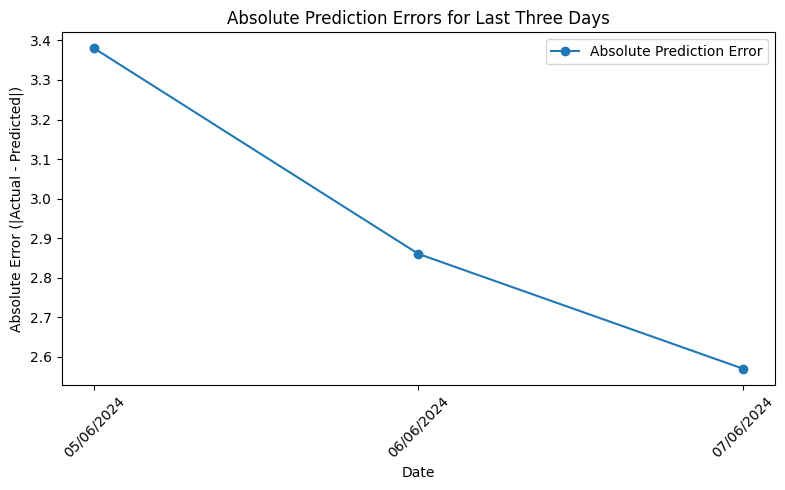

In [ ]:
import pandas as pd
import numpy as np

# Assuming the DataFrame 'df' is already loaded with the CSV file
file_path = '/content/First#3days - Sheet1 (1).csv'  # Change this to your file path
df = pd.read_csv(file_path)

# Ensure the 'date' column is of datetime type and in day/month/year format
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

# Get the actual temperatures for the last three days
actual_temps_last_3_days = df['Actual Temp'].tail(3).values
dates_last_3_days = df['Date'].tail(3).values

# Provide predicted values directly in the code
predicted_temps_last_3_days = [30.38, 28.86, 28.57]

# Calculate the prediction errors for the last three days
errors_last_3_days = actual_temps_last_3_days - predicted_temps_last_3_days

# Calculate the absolute values (modulus) of the errors
absolute_errors_last_3_days = np.abs(errors_last_3_days)

# Print the results
for i in range(3):
    # Format the date as day/month/year for printing
    date_str = dates_last_3_days[i].astype('M8[D]').astype(object).strftime('%d/%m/%Y')
    print(f"Date: {date_str}, Actual Temp: {actual_temps_last_3_days[i]}, "
          f"Predicted Temp: {predicted_temps_last_3_days[i]}, Error: {errors_last_3_days[i]}, "
          f"Absolute Error: {absolute_errors_last_3_days[i]}")

# Plotting the absolute errors for the last three days
import matplotlib.pyplot as plt

# Convert NumPy datetime64 array to datetime.date objects and format them as day/month/year
dates_last_3_days_str = [date.astype('M8[D]').astype(object).strftime('%d/%m/%Y') for date in dates_last_3_days]

plt.figure(figsize=(8, 5))
plt.plot(dates_last_3_days_str, absolute_errors_last_3_days, marker='o', linestyle='-', label='Absolute Prediction Error')

plt.xlabel('Date')
plt.ylabel('Absolute Error (|Actual - Predicted|)')
plt.title('Absolute Prediction Errors for Last Three Days')
plt.legend()
#plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Weather app errors

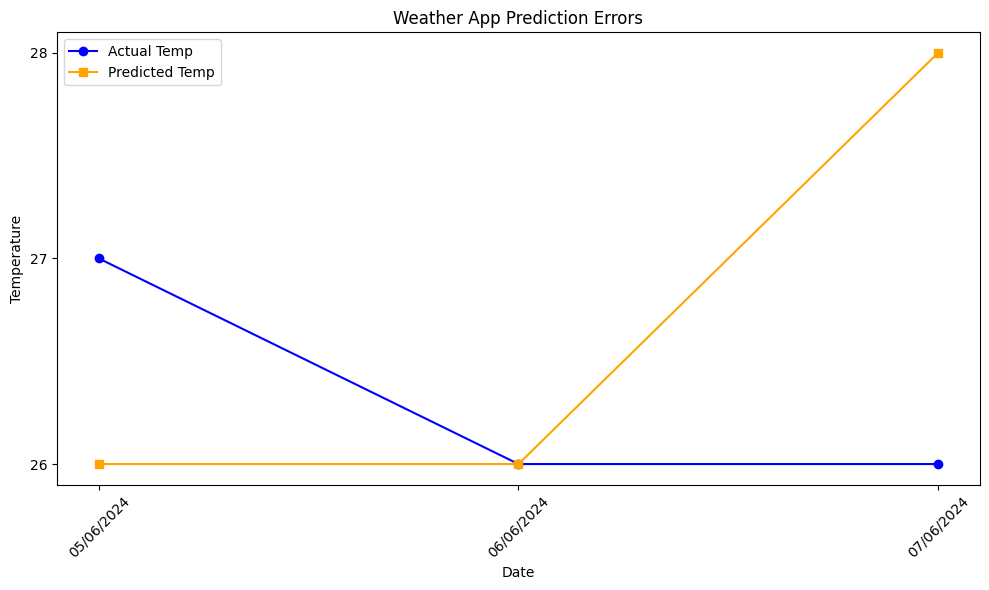

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates

# Define the path to the data file
file_path = '/content/First#3days - Sheet1 (1).csv'  # Change this to your actual file path

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Get the actual temperatures from the last three rows of the 'Actual Temp' column
last_three_actual_temps = df['Actual Temp'].tail(3).values

# Manually input the dates and predicted temperatures for the last three days
last_three_date_strings = [
    "05/06/2024",  # Enter the first date in day/month/year format
    "06/06/2024",  # Enter the second date
    "07/06/2024"   # Enter the third date
]
predicted_temps = [
    26.0,  # Enter the predicted temperature for the first date
    26.0,  # Enter the predicted temperature for the second date
    28.0   # Enter the predicted temperature for the third date
]

# Convert the date strings to datetime objects
last_three_dates = [pd.to_datetime(date_str, format='%d/%m/%Y') for date_str in last_three_date_strings]

# Convert datetime objects to Matplotlib numerical dates
last_three_dates_num = mdates.date2num(last_three_dates)

# Plot the actual and predicted temperatures
plt.figure(figsize=(10, 6))
plt.plot(last_three_dates_num, last_three_actual_temps, marker='o', linestyle='-', color='blue', label='Actual Temp')
plt.plot(last_three_dates_num, predicted_temps, marker='s', linestyle='-', color='orange', label='Predicted Temp')

plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Weather App Prediction Errors')
plt.legend()
#plt.grid(True)

# Format the x-axis to display only the input dates
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%Y'))
plt.xticks(rotation=45)

# Set y-axis to only show whole numbers
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True))

plt.tight_layout()
plt.show()

# Absolute Weather App Errors

Date: 05/06/2024, Actual Temp: 27, Weather App Predicted Temp: 26, Weather App Error: 1, Absolute Weather App Error: 1
Date: 06/06/2024, Actual Temp: 26, Weather App Predicted Temp: 26, Weather App Error: 0, Absolute Weather App Error: 0
Date: 07/06/2024, Actual Temp: 26, Weather App Predicted Temp: 28, Weather App Error: -2, Absolute Weather App Error: 2


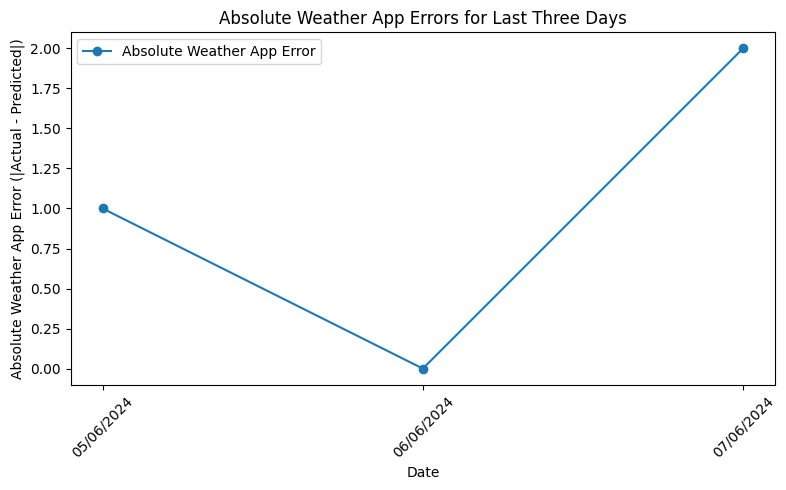

In [ ]:
import pandas as pd
import numpy as np

# Assuming the DataFrame 'df' is already loaded with the CSV file
file_path = '/content/First#3days - Sheet1 (1).csv'  # Change this to your file path
df = pd.read_csv(file_path)

# Ensure the 'date' column is of datetime type and in day/month/year format
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

# Get the actual temperatures for the last three days
actual_temps_last_3_days = df['Actual Temp'].tail(3).values
dates_last_3_days = df['Date'].tail(3).values

# Weather app predicted values
weather_app_predicted_temps = [26, 26, 28]

# Calculate the weather app prediction errors
weather_app_errors = actual_temps_last_3_days - weather_app_predicted_temps

# Calculate the absolute values (modulus) of the weather app errors
absolute_weather_app_errors = np.abs(weather_app_errors)

# Print the results
for i in range(3):
    # Format the date as day/month/year for printing
    date_str = dates_last_3_days[i].astype('M8[D]').astype(object).strftime('%d/%m/%Y')
    print(f"Date: {date_str}, Actual Temp: {actual_temps_last_3_days[i]}, "
          f"Weather App Predicted Temp: {weather_app_predicted_temps[i]}, Weather App Error: {weather_app_errors[i]}, "
          f"Absolute Weather App Error: {absolute_weather_app_errors[i]}")

# Plotting the absolute weather app errors for the last three days
import matplotlib.pyplot as plt

# Convert NumPy datetime64 array to datetime.date objects and format them as day/month/year
dates_last_3_days_str = [date.astype('M8[D]').astype(object).strftime('%d/%m/%Y') for date in dates_last_3_days]

plt.figure(figsize=(8, 5))
plt.plot(dates_last_3_days_str, absolute_weather_app_errors, marker='o', linestyle='-', label='Absolute Weather App Error')

plt.xlabel('Date')
plt.ylabel('Absolute Weather App Error (|Actual - Predicted|)')
plt.title('Absolute Weather App Errors for Last Three Days')
plt.legend()
#plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting the predictions of the model  and actual temperature

<Axes: xlabel='Date'>

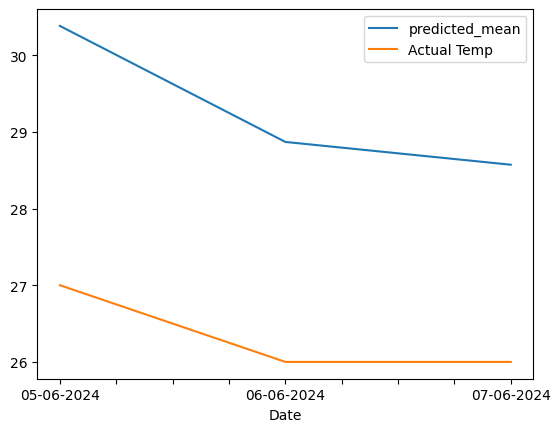

In [ ]:
pred.plot(legend=True)
test['Actual Temp'].plot(legend=True)

The above graph clearly shows how much the predicted values deviate from actual temps which is basically the error in predictions.

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
test['Actual Temp'].mean()


26.333333333333332

In [ ]:
rmse=sqrt(mean_squared_error(pred,test['Actual Temp']))
print(rmse)

2.9593897735663566


# Testing and Training a bigger dataset(40 day dataset)

Reading the Data file

In [ ]:
import pandas as pd
df=pd.read_csv('/content/alldays_analysis - Sheet1.csv', parse_dates=['Date']) # Read the CSV without setting 'Date' as index initially
#df['Date'] = df['Date'].dt.strftime('%d-%m-%Y') # Reformat the 'Date' column
df = df.set_index('Date') # Now set 'Date' as the index
print('Shape of data',df.shape)
df.head()
df

Shape of data (40, 4)


,Actual Temp,Predicted_temp_day1,Predicted_temp_day2,Predicted_temp_day3
Date,,,,
2/6/2024,31,29,29,28
3/6/2024,28,28,27,27
4/6/2024,28,26,26,26
5/6/2024,27,26,26,26
6/6/2024,26,28,27,28
7/6/2024,26,26,26,26
8/6/2024,26,26,25,25
9/6/2024,26,25,25,26
10/6/2024,26,25,26,26


<Axes: xlabel='Date'>

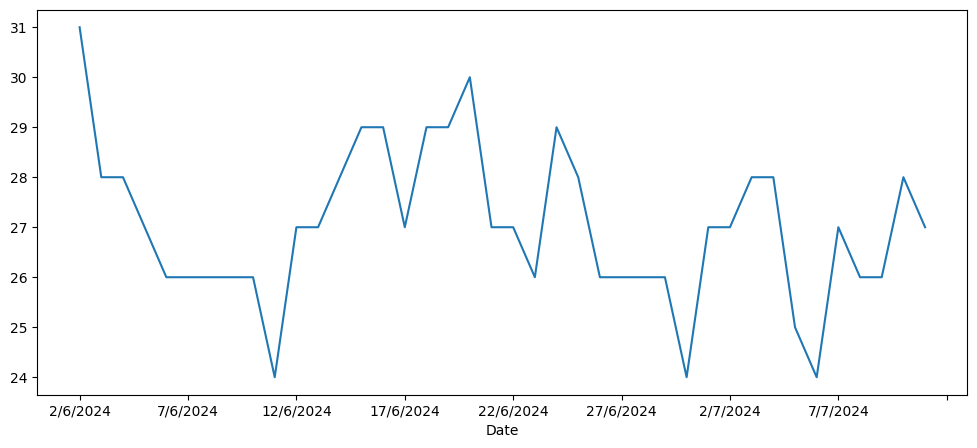

In [ ]:
df['Actual Temp'].plot(figsize=(12,5))

# Checking for Stationarity

In [ ]:
from statsmodels.tsa.stattools import adfuller

def ad_test(dataset):
    dftest = adfuller(dataset, autolag = 'AIC')
    print("1. ADF : ",dftest[0])
    print("2. P-Value : ", dftest[1])
    print("3. Num Of Lags : ", dftest[2])
    print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
    print("5. Critical Values :")
    for key, val in dftest[4].items():
        print("\t",key, ": ", val)

# Call the function after it's defined
ad_test(df['Actual Temp'])

1. ADF :  -4.456475337566213
2. P-Value :  0.0002354873834469665
3. Num Of Lags :  0
4. Num Of Observations Used For ADF Regression: 39
5. Critical Values :
	 1% :  -3.610399601308181
	 5% :  -2.939108945868946
	 10% :  -2.6080629651545038


*** we can clearly see that the p value is less than 0.05, hence the data set is a good time series ***

# Figuring out order for ARIMA model

In [ ]:
from pmdarima import auto_arima
#ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
stepwise_fit = auto_arima(df['Actual Temp'], trace=True,
suppress_warnings=True)

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=151.653, Time=0.41 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=152.104, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=145.749, Time=0.14 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=147.706, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=379.386, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=147.687, Time=0.34 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=147.696, Time=0.37 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=149.672, Time=0.29 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.08 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 1.778 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   40
Model:               SARIMAX(1, 0, 0)   Log Likelihood                 -69.875
Date:                Wed, 17 Jul 2024   AIC                            145.749
Time:                        17:05:00   BIC                            150.816
Sample:                             0   HQIC                           147.581
                                 - 40                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     14.3820      3.891      3.696      0.000       6.755      22.009
ar.L1          0.4695      0.143      3.276      0.001       0.189       0.750
sigma2         1.9154      0.514      3.727      0.000       0.908       2.923
===================================================================================
Ljung-Box (L1) (Q):                   0.33   Jarque-Bera (JB):                 0.53
Prob(Q):                              0.57   Prob(JB):                         0.77
Heteroskedasticity (H):               1.05   Skew:                             0.25
Prob(H) (two-sided):                  0.93   Kurtosis:                         2.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

# Spliting the data into training set and testing set

    we use the initial 37 days data entries for training
    and the next 3 days for testing the model

In [ ]:
print(df.shape)
train=df.iloc[:37]
test=df.iloc[-3:]
print(train.shape,test.shape)

(40, 4)
(37, 4) (3, 4)


# Training the model

In [ ]:
from statsmodels.tsa.arima.model import ARIMA # import the correct ARIMA class
model = ARIMA(train['Actual Temp'], order=(1, 0, 5))
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            Actual Temp   No. Observations:                   37
Model:                 ARIMA(1, 0, 5)   Log Likelihood                 -64.529
Date:                Wed, 17 Jul 2024   AIC                            145.058
Time:                        17:05:19   BIC                            157.945
Sample:                             0   HQIC                           149.602
                                 - 37                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         27.1146      0.376     72.124      0.000      26.378      27.851
ar.L1          0.8196      0.560      1.463      0.143      -0.278       1.917
ma.L1         -0.4383    267.158     -0.002      0.999    -524.058     523.181
ma.L2         -0.1614    149.974     -0.001      0.999    -294.105     293.782
ma.L3         -0.2380    106.796     -0.002      0.998    -209.555     209.079
ma.L4         -0.0698     43.211     -0.002      0.999     -84.762      84.622
ma.L5         -0.0925     24.612     -0.004      0.997     -48.331      48.146
sigma2         1.8313    488.800      0.004      0.997    -956.199     959.861
===================================================================================
Ljung-Box (L1) (Q):                   0.16   Jarque-Bera (JB):                 0.05
Prob(Q):                              0.69   Prob(JB):                         0.97
Heteroskedasticity (H):               1.06   Skew:                             0.09
Prob(H) (two-sided):                  0.92   Kurtosis:                         3.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Making Predictions on test set

In [ ]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels')
print(pred)
pred.index=df.index [start:end+1]
print(pred)

37    27.165409
38    27.429055
39    27.777755
Name: predicted_mean, dtype: float64
Date
9/7/2024     27.165409
10/7/2024    27.429055
11/7/2024    27.777755
Name: predicted_mean, dtype: float64


# Absolute Model Errors

Date: 09/07/2024, Actual Temp: 26, Predicted Temp: 27.16, Error: -1.1600000000000001, Absolute Error: 1.1600000000000001
Date: 10/07/2024, Actual Temp: 28, Predicted Temp: 27.42, Error: 0.5799999999999983, Absolute Error: 0.5799999999999983
Date: 11/07/2024, Actual Temp: 27, Predicted Temp: 27.77, Error: -0.7699999999999996, Absolute Error: 0.7699999999999996


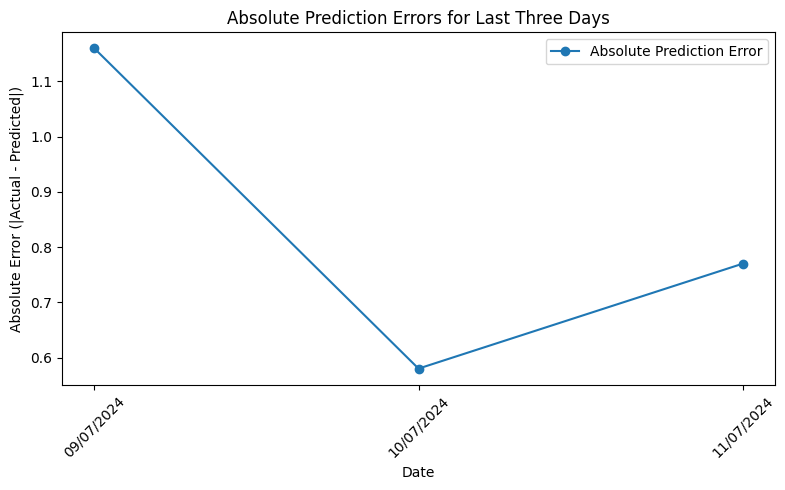

In [ ]:
import pandas as pd
import numpy as np

# Assuming the DataFrame 'df' is already loaded with the CSV file
file_path = '/content/alldays_analysis - Sheet1.csv'  # Change this to your file path
df = pd.read_csv(file_path)

# Ensure the 'date' column is of datetime type and in day/month/year format
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

# Get the actual temperatures for the last three days
actual_temps_last_3_days = df['Actual Temp'].tail(3).values
dates_last_3_days = df['Date'].tail(3).values

# Provide predicted values directly in the code
predicted_temps_last_3_days = [27.16, 27.42, 27.77]

# Calculate the prediction errors for the last three days
errors_last_3_days = actual_temps_last_3_days - predicted_temps_last_3_days

# Calculate the absolute values (modulus) of the errors
absolute_errors_last_3_days = np.abs(errors_last_3_days)

# Print the results
for i in range(3):
    # Format the date as day/month/year for printing
    date_str = dates_last_3_days[i].astype('M8[D]').astype(object).strftime('%d/%m/%Y')
    print(f"Date: {date_str}, Actual Temp: {actual_temps_last_3_days[i]}, "
          f"Predicted Temp: {predicted_temps_last_3_days[i]}, Error: {errors_last_3_days[i]}, "
          f"Absolute Error: {absolute_errors_last_3_days[i]}")

# Plotting the absolute errors for the last three days
import matplotlib.pyplot as plt

# Convert NumPy datetime64 array to datetime.date objects and format them as day/month/year
dates_last_3_days_str = [date.astype('M8[D]').astype(object).strftime('%d/%m/%Y') for date in dates_last_3_days]

plt.figure(figsize=(8, 5))
plt.plot(dates_last_3_days_str, absolute_errors_last_3_days, marker='o', linestyle='-', label='Absolute Prediction Error')

plt.xlabel('Date')
plt.ylabel('Absolute Error (|Actual - Predicted|)')
plt.title('Absolute Prediction Errors for Last Three Days')
plt.legend()
#plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot of the predictions of the model along with Actual temperatures





<Axes: xlabel='Date'>

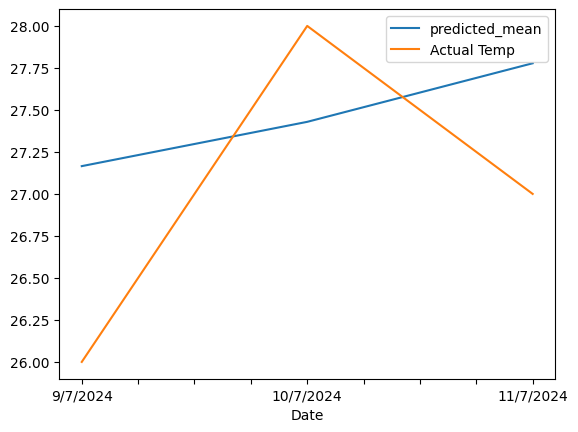

In [ ]:
pred.plot(legend=True)
test['Actual Temp'].plot(legend=True)

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
test['Actual Temp'].mean()

27.0

In [ ]:
rmse=sqrt(mean_squared_error(pred,test['Actual Temp']))
print(rmse)

0.8735096892450472


# Plot of Prediction errors for weather app

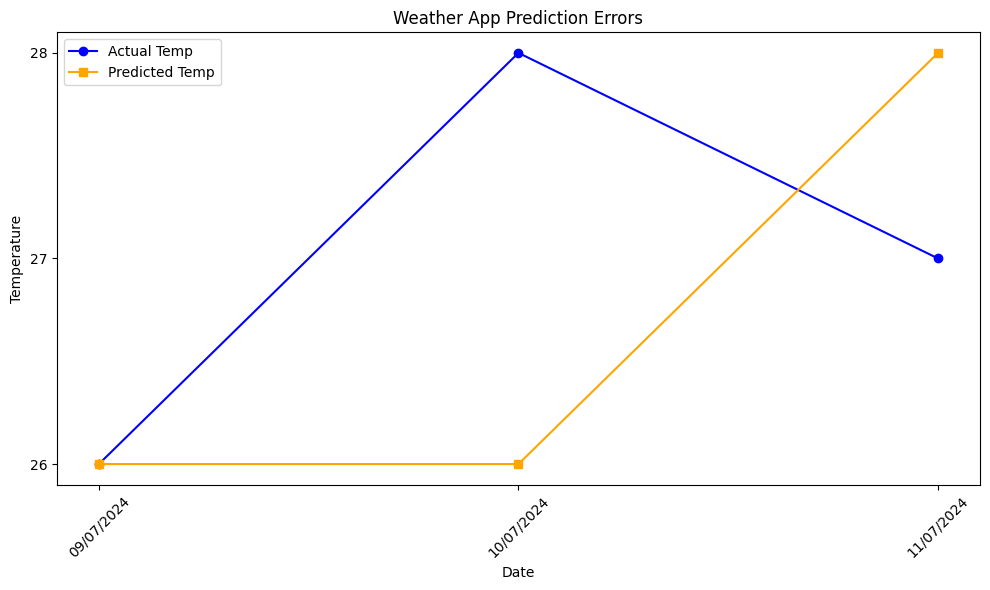

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates

# Define the path to the data file
file_path = '/content/alldays_analysis - Sheet1.csv'  # Change this to your actual file path

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Get the actual temperatures from the last three rows of the 'Actual Temp' column
last_three_actual_temps = df['Actual Temp'].tail(3).values

# Manually input the dates and predicted temperatures for the last three days
last_three_date_strings = [
    "09/07/2024",  # Enter the first date in day/month/year format
    "10/07/2024",  # Enter the second date
    "11/07/2024"   # Enter the third date
]
predicted_temps = [
    26.0,  # Enter the predicted temperature for the first date
    26.0,  # Enter the predicted temperature for the second date
    28.0   # Enter the predicted temperature for the third date
]

# Convert the date strings to datetime objects
last_three_dates = [pd.to_datetime(date_str, format='%d/%m/%Y') for date_str in last_three_date_strings]

# Convert datetime objects to Matplotlib numerical dates
last_three_dates_num = mdates.date2num(last_three_dates)

# Plot the actual and predicted temperatures
plt.figure(figsize=(10, 6))
plt.plot(last_three_dates_num, last_three_actual_temps, marker='o', linestyle='-', color='blue', label='Actual Temp')
plt.plot(last_three_dates_num, predicted_temps, marker='s', linestyle='-', color='orange', label='Predicted Temp')

plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Weather App Prediction Errors')
plt.legend()
#plt.grid(True)

# Format the x-axis to display only the input dates
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%Y'))
plt.xticks(rotation=45)

# Set y-axis to only show whole numbers
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True))

plt.tight_layout()
plt.show()


# Absolute Weather App Errors

Date: 09/07/2024, Actual Temp: 26, Weather App Predicted Temp: 26, Weather App Error: 0, Absolute Weather App Error: 0
Date: 10/07/2024, Actual Temp: 28, Weather App Predicted Temp: 26, Weather App Error: 2, Absolute Weather App Error: 2
Date: 11/07/2024, Actual Temp: 27, Weather App Predicted Temp: 28, Weather App Error: -1, Absolute Weather App Error: 1


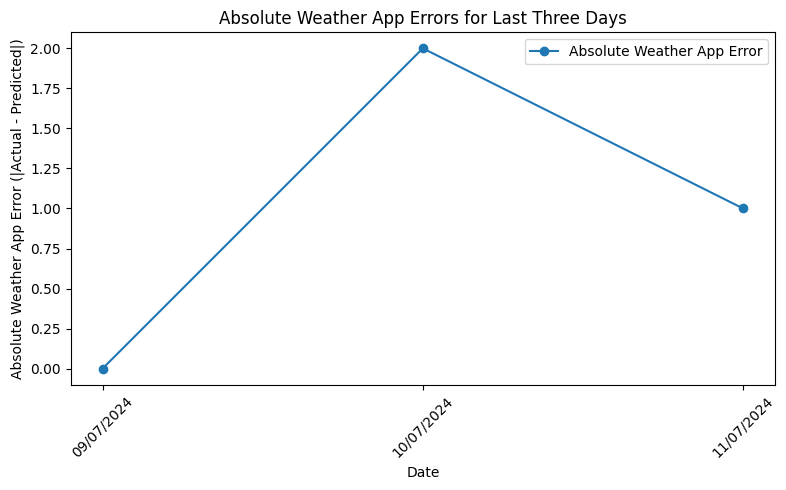

In [ ]:
import pandas as pd
import numpy as np

# Assuming the DataFrame 'df' is already loaded with the CSV file
file_path = '/content/alldays_analysis - Sheet1.csv'  # Change this to your file path
df = pd.read_csv(file_path)

# Ensure the 'date' column is of datetime type and in day/month/year format
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

# Get the actual temperatures for the last three days
actual_temps_last_3_days = df['Actual Temp'].tail(3).values
dates_last_3_days = df['Date'].tail(3).values

# Weather app predicted values
weather_app_predicted_temps = [26, 26, 28]

# Calculate the weather app prediction errors
weather_app_errors = actual_temps_last_3_days - weather_app_predicted_temps

# Calculate the absolute values (modulus) of the weather app errors
absolute_weather_app_errors = np.abs(weather_app_errors)

# Print the results
for i in range(3):
    # Format the date as day/month/year for printing
    date_str = dates_last_3_days[i].astype('M8[D]').astype(object).strftime('%d/%m/%Y')
    print(f"Date: {date_str}, Actual Temp: {actual_temps_last_3_days[i]}, "
          f"Weather App Predicted Temp: {weather_app_predicted_temps[i]}, Weather App Error: {weather_app_errors[i]}, "
          f"Absolute Weather App Error: {absolute_weather_app_errors[i]}")

# Plotting the absolute weather app errors for the last three days
import matplotlib.pyplot as plt

# Convert NumPy datetime64 array to datetime.date objects and format them as day/month/year
dates_last_3_days_str = [date.astype('M8[D]').astype(object).strftime('%d/%m/%Y') for date in dates_last_3_days]

plt.figure(figsize=(8, 5))
plt.plot(dates_last_3_days_str, absolute_weather_app_errors, marker='o', linestyle='-', label='Absolute Weather App Error')

plt.xlabel('Date')
plt.ylabel('Absolute Weather App Error (|Actual - Predicted|)')
plt.title('Absolute Weather App Errors for Last Three Days')
plt.legend()
#plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting the Mean Errors for both the Data sets

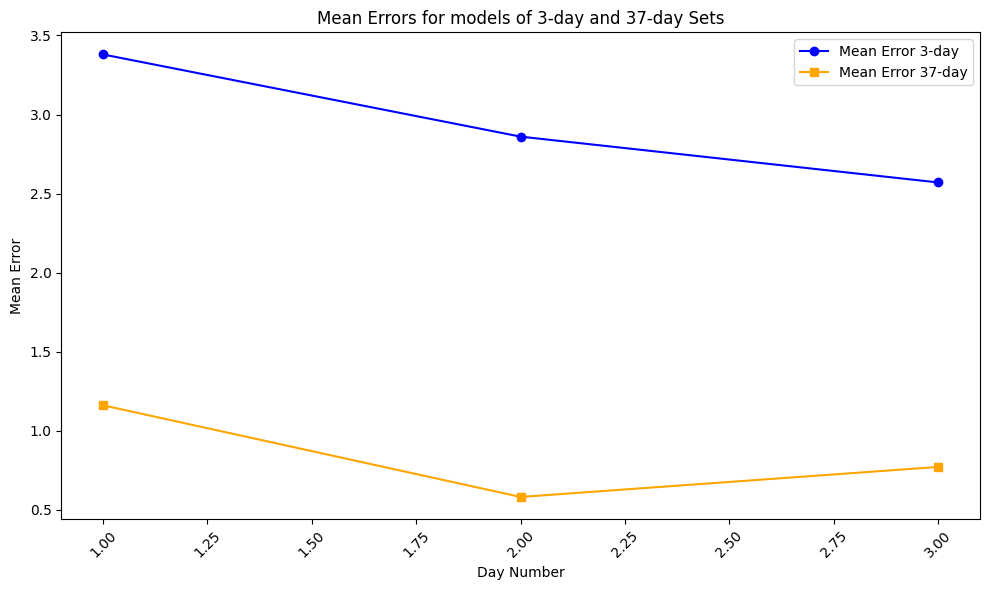

In [ ]:
import matplotlib.pyplot as plt

# Initialize lists to store day numbers and mean errors
days = []
mean_error_3day = []
mean_error_37day = []

# Manually input the data
data = [
    (1, 3.38, 1.16),  # (day, mean_error_3day, mean_error_37day)
    (2, 2.86, 0.58),
    (3, 2.57, 0.77)
]

# Populate the lists with the input data
for entry in data:
    day, error_3day, error_37day = entry
    days.append(day)
    mean_error_3day.append(error_3day)
    mean_error_37day.append(error_37day)

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(days, mean_error_3day, marker='o', linestyle='-', color='blue', label='Mean Error 3-day')
plt.plot(days, mean_error_37day, marker='s', linestyle='-', color='orange', label='Mean Error 37-day')

plt.xlabel('Day Number')
plt.ylabel('Mean Error')
plt.title('Mean Errors for models of 3-day and 37-day Sets')
plt.legend()
#plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


we can see the errors in predictions by both models been plotted for the next 3 days i.e day1,day2,and day3 which is calculated as:
   
   mean error for 3 day= |predicted(i)-actual temp(i)|
  
    
   mean error for 37 day=|prediction(i)-actual temp(i)|

  where i is the day number and prediction is the predicted values by the respective models

# Error Analysis for Lags

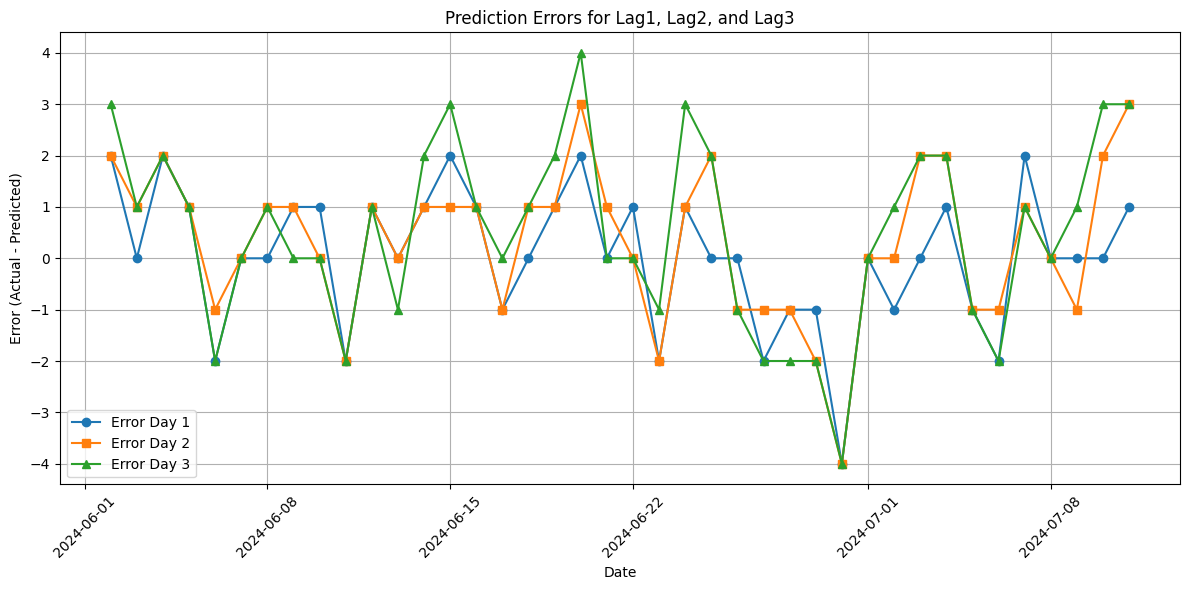

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
file_path = '/content/alldays_analysis - Sheet1.csv'  # Change this to your file path
df = pd.read_csv(file_path)

# Try to infer the date format automatically using `dayfirst=True`
df['date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')



# Calculate errors
df['error_day_1'] = df['Actual Temp'] - df['Predicted_temp_day1']
df['error_day_2'] = df['Actual Temp'] - df['Predicted_temp_day2']
df['error_day_3'] = df['Actual Temp'] - df['Predicted_temp_day3']

# ... (rest of your code)
# Plot the errors
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['error_day_1'], marker='o', linestyle='-', label='Error Day 1')
plt.plot(df['date'], df['error_day_2'], marker='s', linestyle='-', label='Error Day 2')
plt.plot(df['date'], df['error_day_3'], marker='^', linestyle='-', label='Error Day 3')

plt.xlabel('Date')
plt.ylabel('Error (Actual - Predicted)')
plt.title('Prediction Errors for Lag1, Lag2, and Lag3')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:

# Calculate summary statistics
mean_error_1 = df['error_day_1'].mean()
mae_error_1 = df['error_day_1'].abs().mean()
rmse_error_1 = (df['error_day_1']**2).mean()**0.5

mean_error_2 = df['error_day_2'].mean()
mae_error_2 = df['error_day_2'].abs().mean()
rmse_error_2 = (df['error_day_2']**2).mean()**0.5

mean_error_3 = df['error_day_3'].mean()
mae_error_3 = df['error_day_3'].abs().mean()
rmse_error_3 = (df['error_day_3']**2).mean()**0.5

print(f"Day 1 - Mean Error: {mean_error_1}, MAE: {mae_error_1}, RMSE: {rmse_error_1}")
print(f"Day 2 - Mean Error: {mean_error_2}, MAE: {mae_error_2}, RMSE: {rmse_error_2}")
print(f"Day 3 - Mean Error: {mean_error_3}, MAE: {mae_error_3}, RMSE: {rmse_error_3}")

Day 1 - Mean Error: 0.05, MAE: 1.0, RMSE: 1.3416407864998738
Day 2 - Mean Error: 0.325, MAE: 1.225, RMSE: 1.5083103128998356
Day 3 - Mean Error: 0.5, MAE: 1.5, RMSE: 1.857417562100671


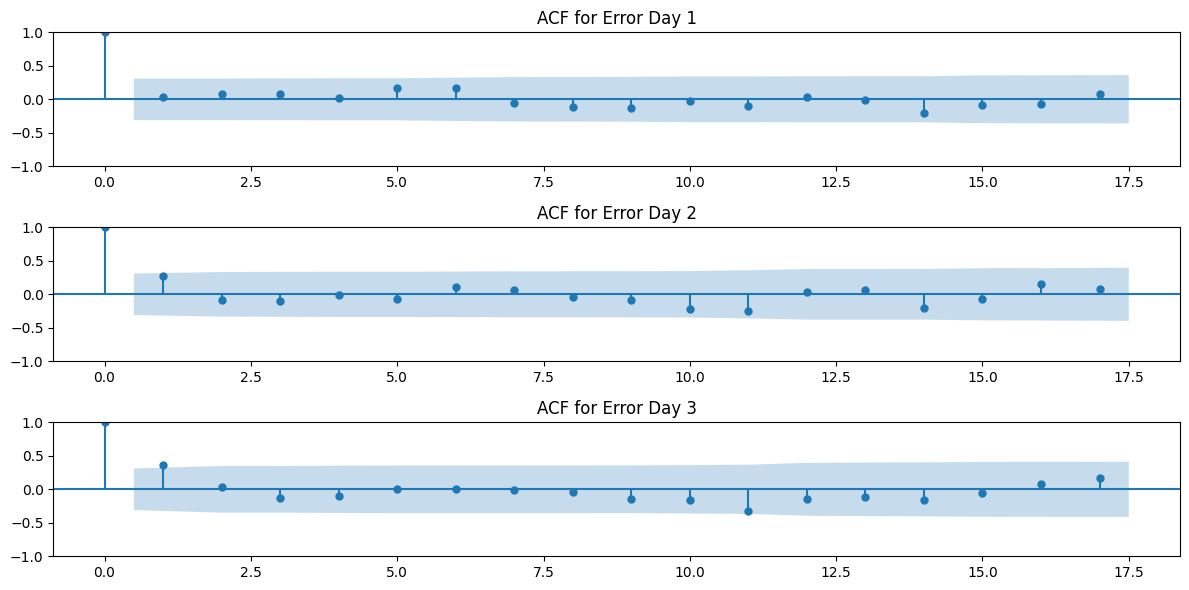

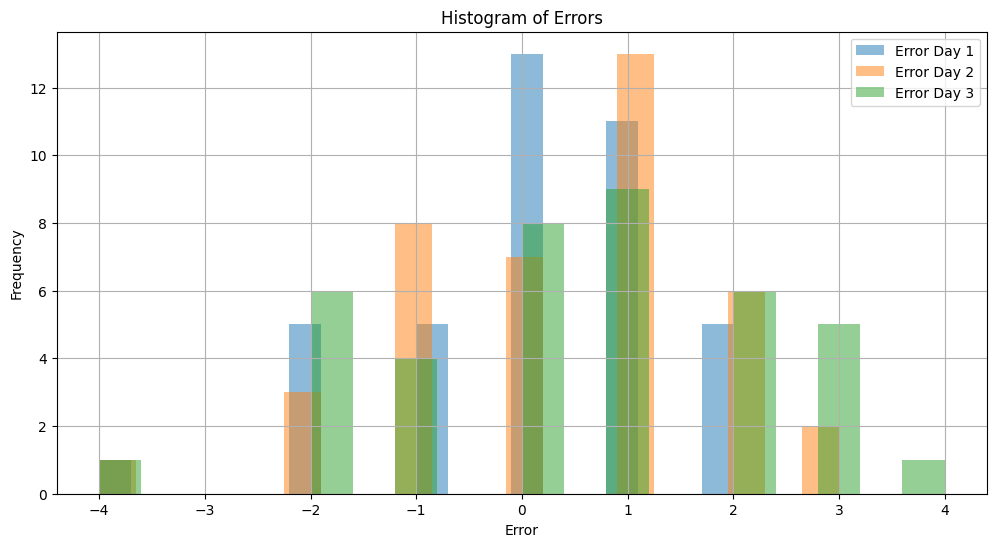

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
# Residual Analysis
plt.figure(figsize=(12, 6))

# ACF plot for errors
plt.subplot(3, 1, 1)
plot_acf(df['error_day_1'], ax=plt.gca())
plt.title('ACF for Error Day 1')

plt.subplot(3, 1, 2)
plot_acf(df['error_day_2'], ax=plt.gca())
plt.title('ACF for Error Day 2')

plt.subplot(3, 1, 3)
plot_acf(df['error_day_3'], ax=plt.gca())
plt.title('ACF for Error Day 3')

plt.tight_layout()
plt.show()

# Check if errors are normally distributed
plt.figure(figsize=(12, 6))
plt.hist(df['error_day_1'], bins=20, alpha=0.5, label='Error Day 1')
plt.hist(df['error_day_2'], bins=20, alpha=0.5, label='Error Day 2')
plt.hist(df['error_day_3'], bins=20, alpha=0.5, label='Error Day 3')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.legend()
plt.title('Histogram of Errors')
plt.grid(True)
plt.show()

# Plotting the errors for lag1, lag2, and lag3 predictions for both model and the weather app.

        for this we calculate the lagged errors based
        on the difference in temps upto three previous days

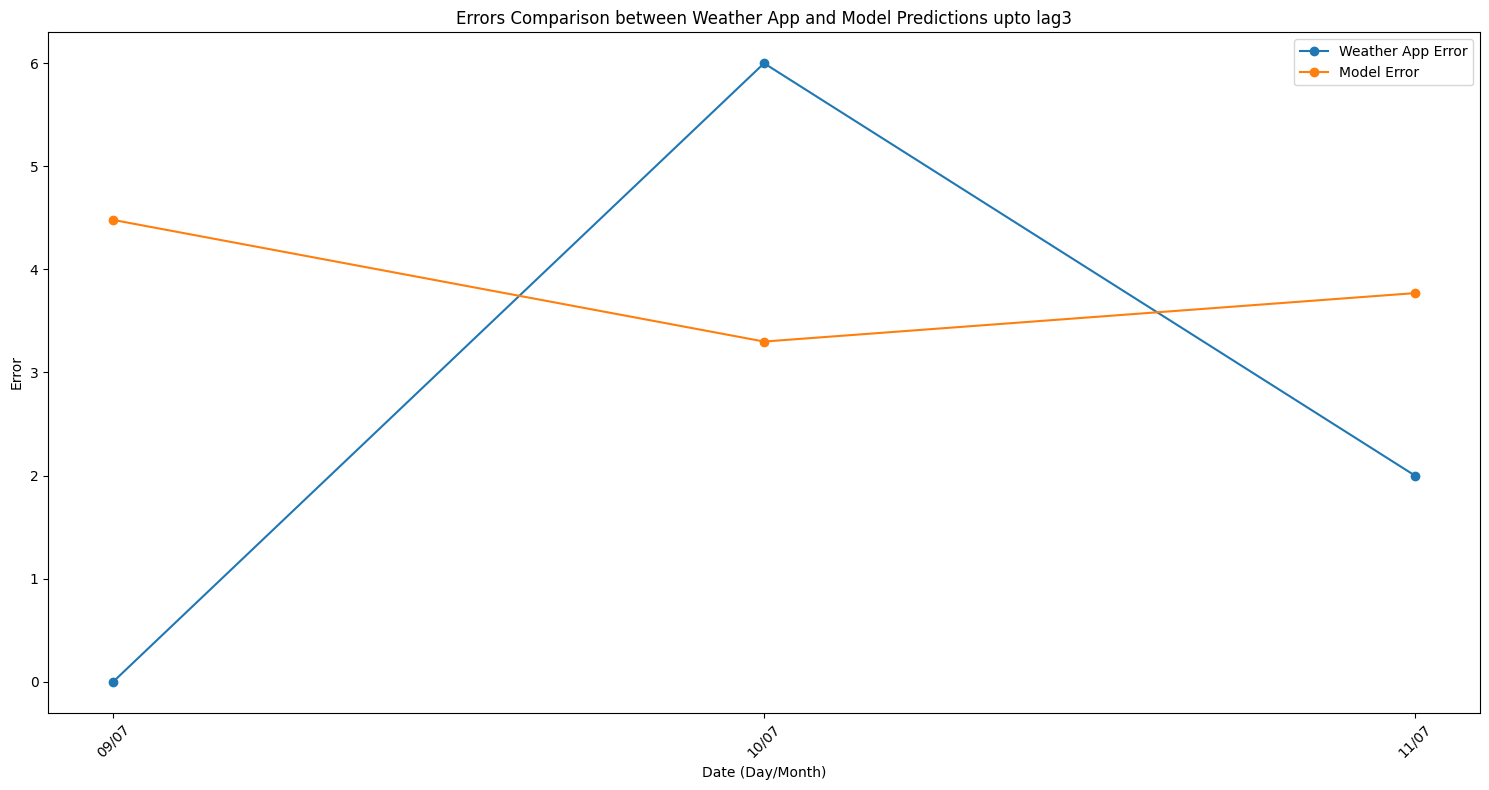

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime

# Read the CSV file from the specified path
file_path = '/content/lagged errors - Sheet1.csv'
data = pd.read_csv(file_path)

# Ensure the date column is in datetime format
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')

# Extract data
dates = data['Date']
weather_app_errors = data['Weather App Error']
model_errors = data['Model Error']

# Convert dates to only day/month format
dates_formatted = dates.dt.strftime('%d/%m')

# Plotting the data
plt.figure(figsize=(15, 8))

# Plot errors for Weather App and Model
plt.plot(dates_formatted, weather_app_errors, label='Weather App Error', marker='o')
plt.plot(dates_formatted, model_errors, label='Model Error', marker='o')

# Formatting the plot
plt.xlabel('Date (Day/Month)')
plt.ylabel('Error')
plt.title('Errors Comparison between Weather App and Model Predictions upto lag3')
plt.legend()
#plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()


In the above plot,each error data point is upto lag 3.
This is not an ideal plot due to the effect of external factors like fluctuations in weather caused by the rains.

 The first data point and last data point show that model has greater error which is true given the fact that weather app uses enormously large datasets for training its models inorder to make  predictions whereas we have only used a small dataset of 37 days to train our model.